<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> Exercício de MAC0209 - Modelagem e Simulação</a> </font>

Rafael Baía Sales - 15484912 (IME-USP)

Rafael dos Santos Lombardi - 15485062 (IME-USP)

***
<font size="5"> EP2 - Mobilidade Pedestre </font>
***

# Setup

In [2]:
# setup aqui

## Depois a gente exporta para o Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

#################

import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sideseeing_tools import sideseeing, plot


# Lib

In [3]:
# lib aqui


# edite seu path abaixo:
# def myPath():
#   workDir = '/content/drive/MyDrive/doc/Courses/Modelagem/programas/jupyter/2022/'
#   return(workDir)

# def demoWorkDir():
#   # usa o ponto de montagem do google drive para  ler e salvar dados
#   wd = myPath()
#   csvFile = wd + 'foo.csv'

#   df = pd.read_csv(csvFile, sep = ';')
#   print(df.to_string())

# demoWorkDir()

##################

def plotxyz(ds: pd.core.frame.DataFrame, dimensions: str = "xyz", title: str = None, ylabel: str = None):
    fig = plt.figure(figsize=(15,5))
    if 'x' in dimensions: plt.plot(ds['Time (s)'], ds['x'], label='x')
    if 'y' in dimensions: plt.plot(ds['Time (s)'], ds['y'], label='y')
    if 'z' in dimensions: plt.plot(ds['Time (s)'], ds['z'], label='z')
    plt.xlabel("Tempo (s)")
    
    if title: plt.title(title)
    if ylabel: plt.ylabel(ylabel)
    
    plt.legend()
    plt.show()
    
    return


---
# Main

In [4]:
mu_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Reta", name="MU_Reta")
mu_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Zigzag", name="MU_Zigzag")
muv_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Reta", name="MUV_Reta")
muv_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Zigzag", name="MUV_Zigzag")

INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.


### Sensores:

In [5]:
for sensors in ["sensors1", "sensors3", "sensors6"]:
    print(f"{sensors.capitalize()}:")
    for sensor in mu_reta_ds.sensors[sensors].keys():
        print(f" - {sensor}")
    print()

Sensors1:
 - stk33911 light  non-wakeup
 - lps22hh pressure sensor non-wakeup

Sensors3:
 - lsm6dso lsm6dso accelerometer non-wakeup
 - ak09918 magnetometer
 - lsm6dso lsm6dso gyroscope non-wakeup
 - gravity  non-wakeup
 - linear_acceleration

Sensors6:
 - ak09918 magnetometer-uncalibrated
 - lsm6dso lsm6dso gyroscope-uncalibrated non-wakeup



* Mais detalhes sobre os sensores em [https://developer.android.com/develop/sensors-and-location/sensors/sensors_overview](https://developer.android.com/develop/sensors-and-location/sensors/sensors_overview)

---
## MU Reta

- #### **Aceleração Linear**

Instância: '2-2025-05-22-14-55-27-504'


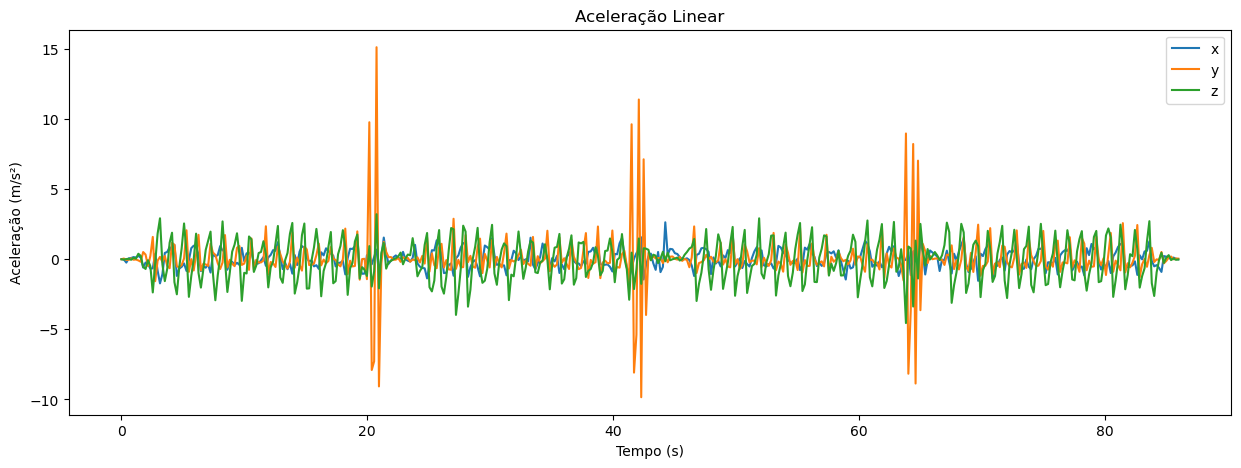

In [6]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_accel = mu_reta_sample.sensors3['linear_acceleration'] # Exclui a gravidade, 'lsm6dso lsm6dso accelerometer non-wakeup' inclui

plotxyz(mu_reta_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '2-2025-05-22-14-58-55-062'


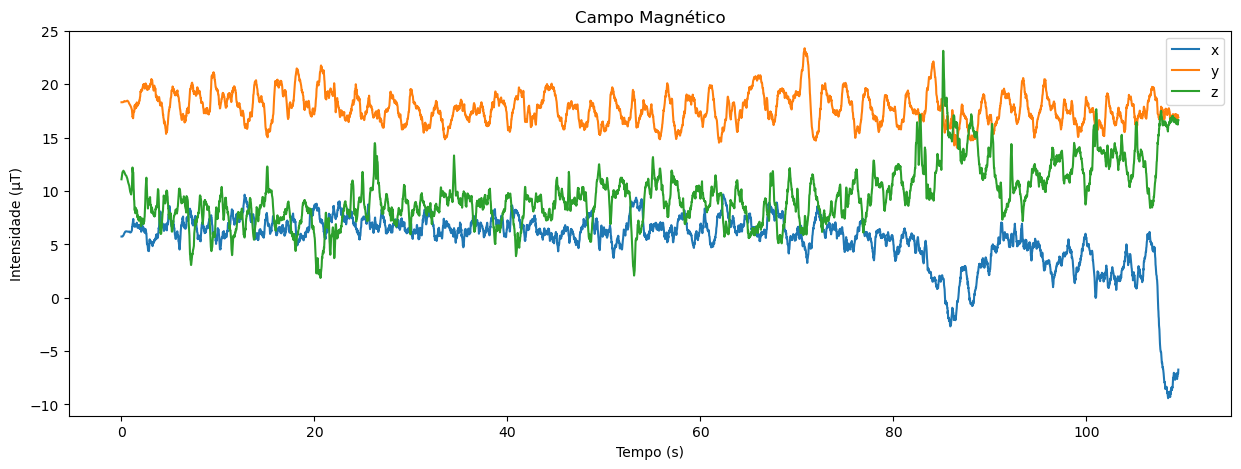

In [7]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_magnet = mu_reta_sample.sensors3['ak09918 magnetometer'] 

plotxyz(mu_reta_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '2-2025-05-22-14-55-27-504'


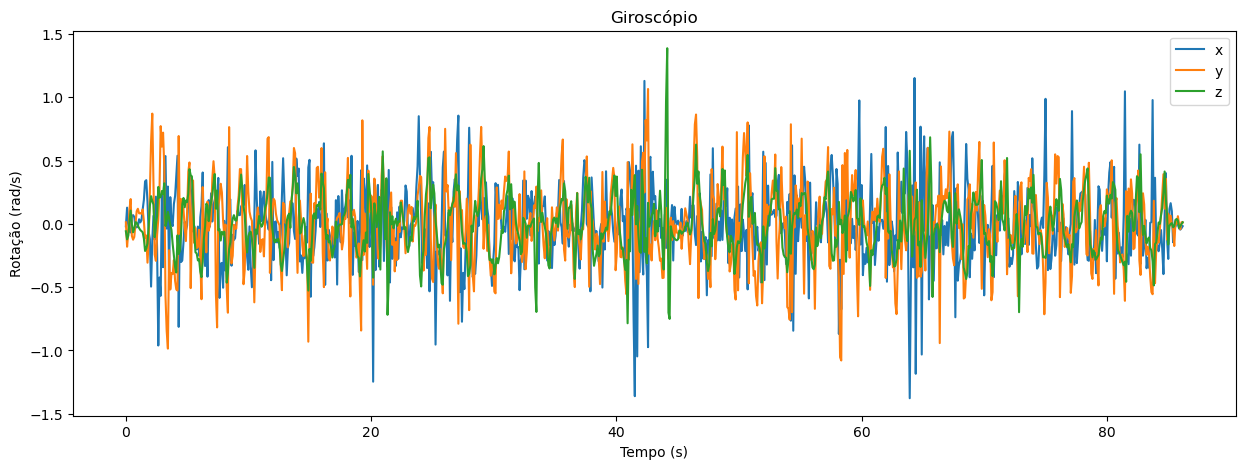

In [32]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_gyro = mu_reta_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(mu_reta_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
## MU Zigue Zague

- #### **Aceleração Linear**

Instância: '1-2025-05-22-15-18-30-442'


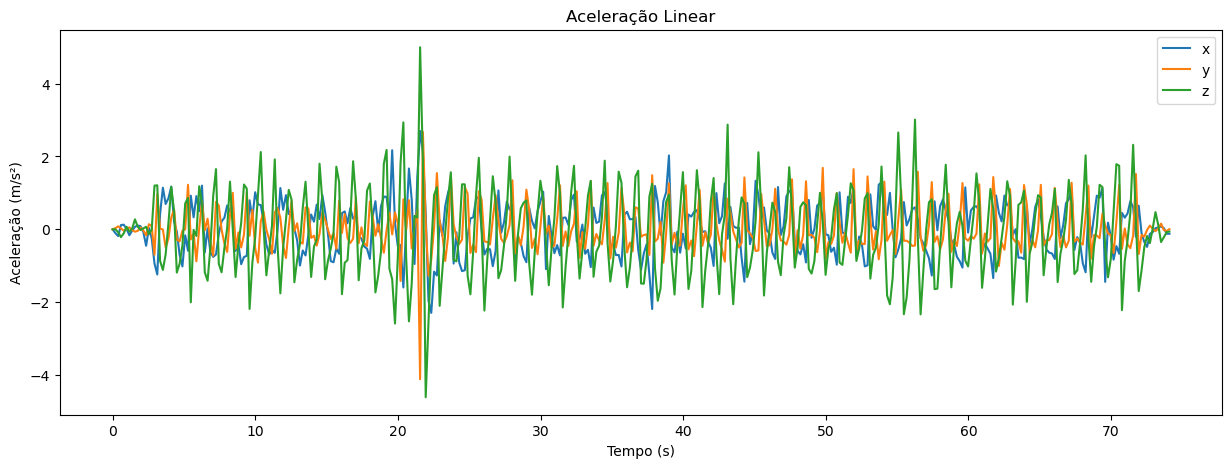

In [8]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_accel = mu_zz_sample.sensors3['linear_acceleration']

plotxyz(mu_zz_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '1-2025-05-22-15-22-05-446'


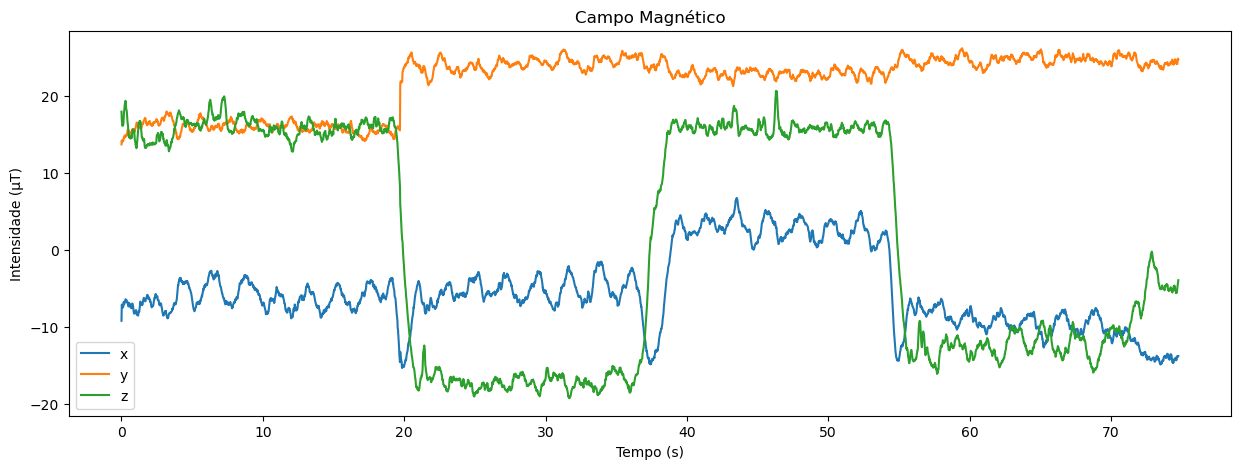

In [9]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_magnet = mu_zz_sample.sensors3['ak09918 magnetometer'] 

plotxyz(mu_zz_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '1-2025-05-22-15-18-30-442'


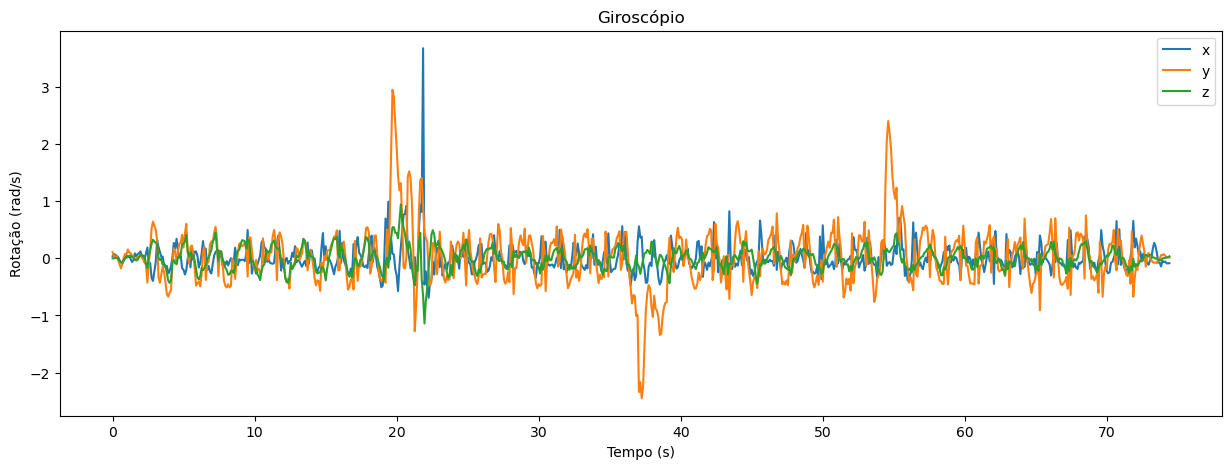

In [24]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_gyro = mu_zz_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(mu_zz_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
## MUV Reta

- #### **Aceleração Linear**

Instância: '2025-05-22-15-57-57-936'


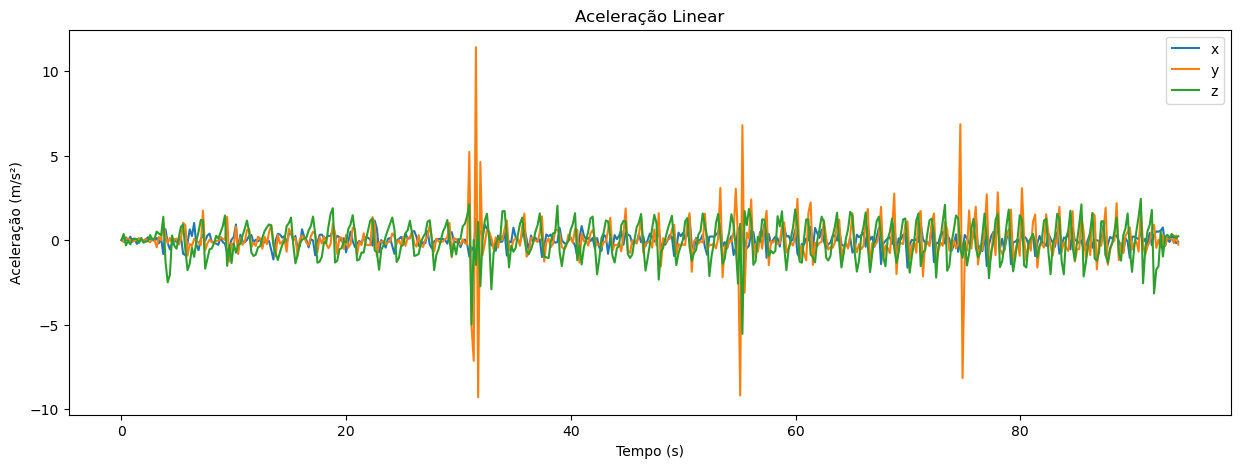

In [11]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_accel = muv_reta_sample.sensors3['linear_acceleration']

plotxyz(muv_reta_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '1-2025-05-22-15-51-16-263'


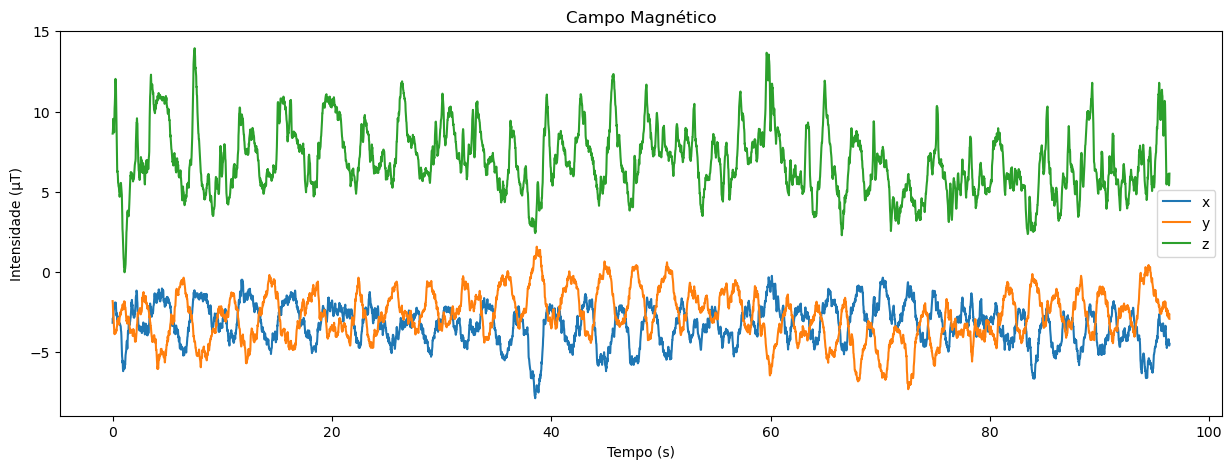

In [12]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_magnet = muv_reta_sample.sensors3['ak09918 magnetometer'] 

plotxyz(muv_reta_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '2025-05-22-16-00-02-137'


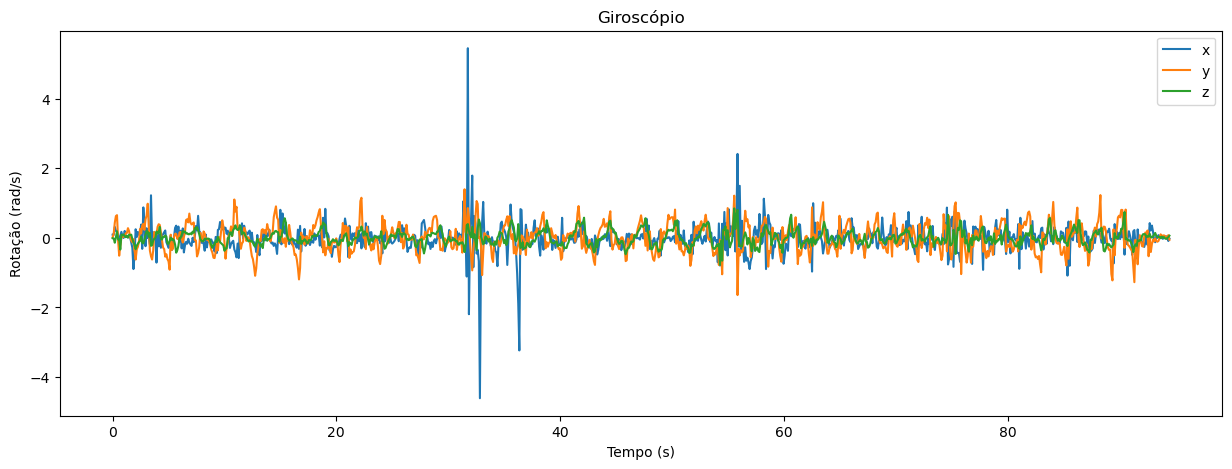

In [33]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_gyro = muv_reta_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(muv_reta_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
## MUV Zigue Zague

- #### **Aceleração Linear**

Instância: '1-2025-05-22-15-33-06-840'


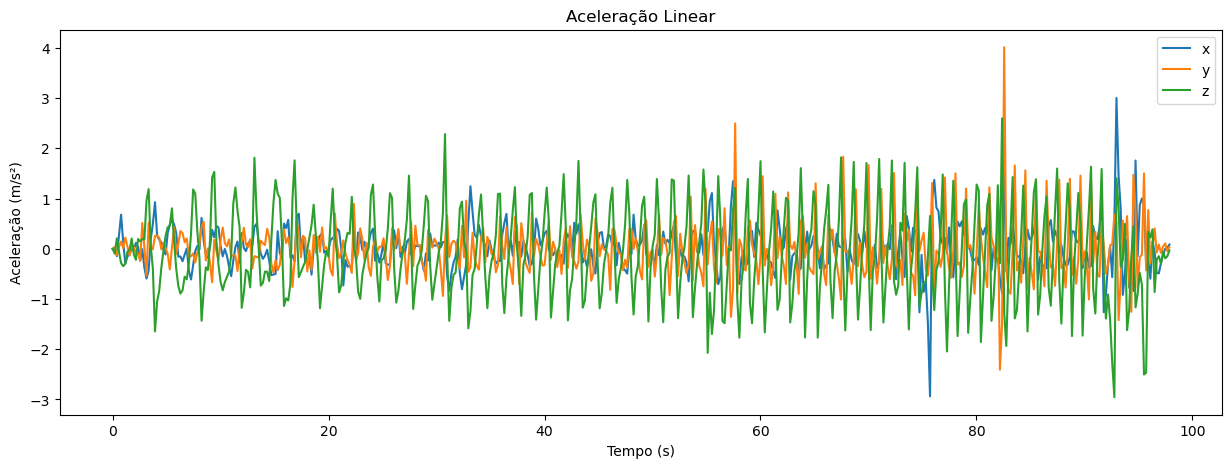

In [13]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_accel = muv_zz_sample.sensors3['linear_acceleration']

plotxyz(muv_zz_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '1-2025-05-22-15-33-06-840'


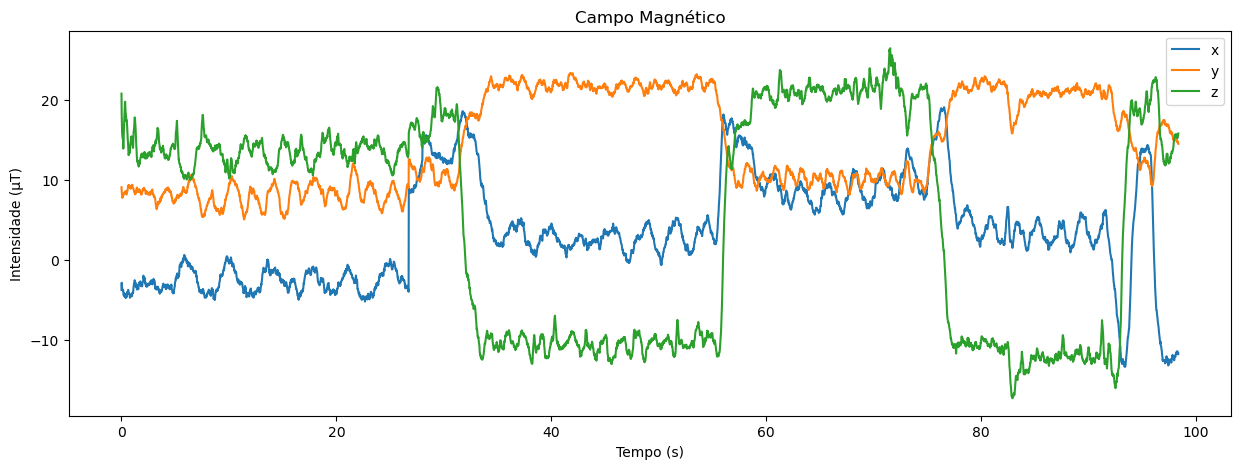

In [14]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_magnet = muv_zz_sample.sensors3['ak09918 magnetometer'] 

plotxyz(muv_zz_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '1-2025-05-22-15-33-06-840'


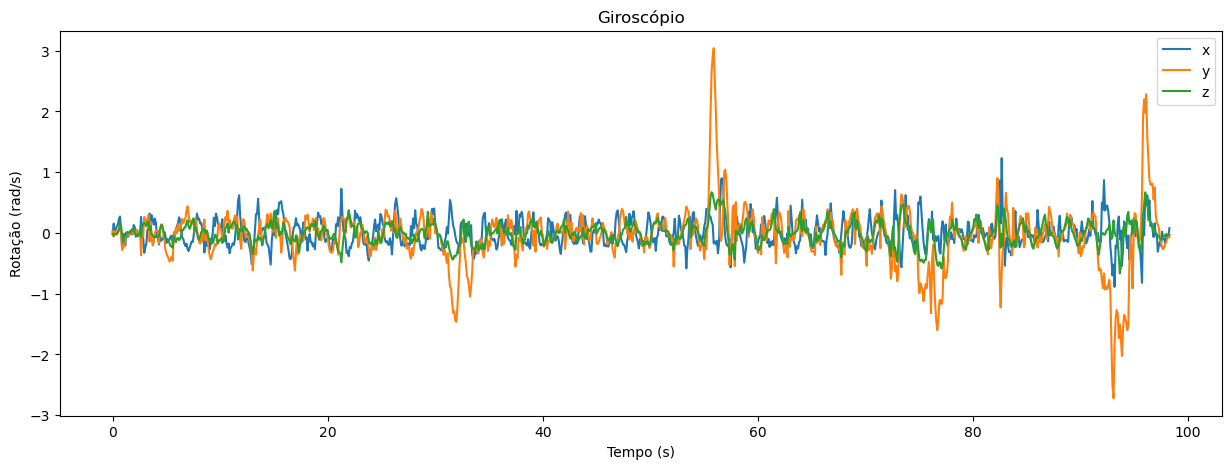

In [ ]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_gyro = muv_zz_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(muv_zz_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")